# Decision Tree Modelling for Marketing Data

In [1]:
#Load Libraries
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
filepath = os.path.join("..","Course Work")

In [3]:
#read the marketing campaing csv file in to a dataframe
modMark = pd.read_csv(os.path.join(filepath,"ModifiedMarketingClean.csv"))

In [4]:
modMark.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,102561,0,49,18,2,0,Other,4,0,0,0,1,0,1,0,0
1,102826,0,33,18,3,0,Crafts,4,0,1,1,0,0,1,0,0
2,101980,0,62,18,2,0,Prof,4,0,0,0,1,0,1,0,0
3,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
4,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


In [5]:
feature_cols = ['CUST_GENDER', 'AGE', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION', 'HOUSEHOLD_SIZE',
               'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION', 
               'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI']

In [6]:
x = modMark[feature_cols] #featured columns
y = modMark['AFFINITY_CARD'] #Target Variable

Split the Data into Train and Test sets.

In [7]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1) # 60% training and 40% test

# Build the Decision Tree Model

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Evaluate the model

Accuracy can be computed by comparing actual test set values and predicted values

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.77


# Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus. 

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

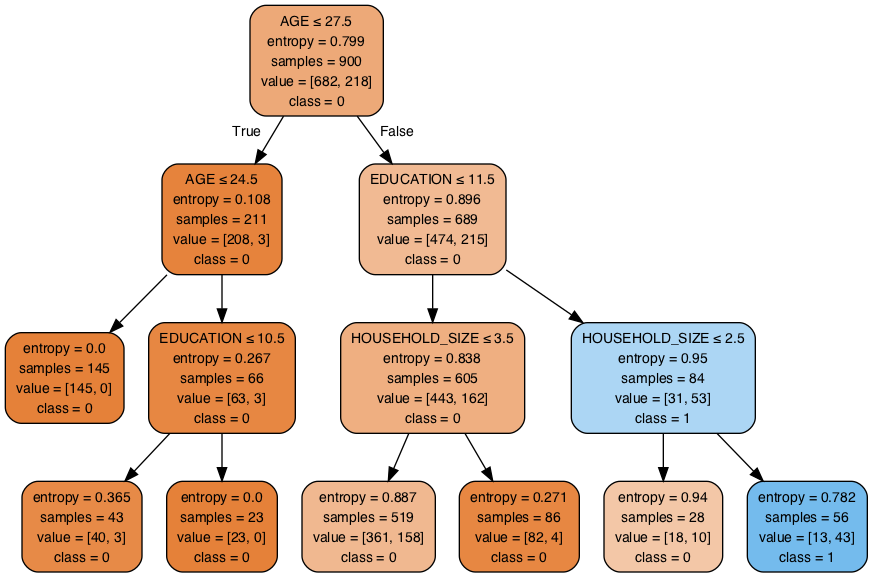

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('MarketingDataDTree.png')
Image(graph.create_png())